In [1]:
# Cell 1: Install & Import
!pip install gdown -q

import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
import warnings
warnings.filterwarnings('ignore')

print("Libraries installed and imported.")

# Cell 2: Download & Load Data
# 1. Download the file directly from your Google Drive link
file_id = '1Mfi4InZjUUPxW6QJnYXM18kYrhdOIcgk'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'games.csv'
gdown.download(url, output, quiet=False)

# 2. Load the dataset
df = pd.read_csv('games.csv')

# Display first 5 rows
display(df.head())

# Check data types and missing values
print("\n--- Data Info ---")
df.info()

Libraries installed and imported.


Downloading...
From: https://drive.google.com/uc?id=1Mfi4InZjUUPxW6QJnYXM18kYrhdOIcgk
To: /content/games.csv
100%|██████████| 7.67M/7.67M [00:00<00:00, 40.7MB/s]


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage:

In [2]:
# 1. Check for missing values
print(f"Missing values before cleaning:\n{df.isnull().sum()}")

# 2. Handle Target Variable (Winner)
# Since we are doing Binary Classification, we will remove 'draw'
print(f"\nOriginal shape: {df.shape}")
df = df[df['winner'] != 'draw']
print(f"Shape after dropping draws: {df.shape}")

# 3. Drop duplicates (if any)
df = df.drop_duplicates(subset=['id'])

Missing values before cleaning:
id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

Original shape: (20058, 16)
Shape after dropping draws: (19108, 16)


In [3]:
# 1. Create 'rating_difference'
# Positive value = White is stronger, Negative = Black is stronger
df['rating_difference'] = df['white_rating'] - df['black_rating']

# 2. Parse 'increment_code' (Time Control)
# Format is usually "15+2" (15 mins + 2 sec increment)
# We split this string into two numeric columns
split_time = df['increment_code'].str.split('+', expand=True)
df['base_time'] = split_time[0].astype(int)
df['increment'] = split_time[1].astype(int)

# 3. Encode Target Variable
# White = 1, Black = 0
df['target'] = df['winner'].apply(lambda x: 1 if x == 'white' else 0)

# Check the new columns
display(df[['white_rating', 'black_rating', 'rating_difference', 'base_time', 'increment', 'target']].head())

,white_rating,black_rating,rating_difference,base_time,increment,target
0,1500,1191,309,15,2,1
1,1322,1261,61,5,10,0
2,1496,1500,-4,5,10,1
3,1439,1454,-15,20,0,1
4,1523,1469,54,30,3,1


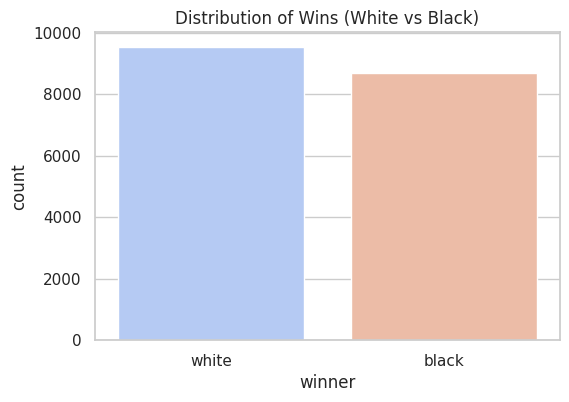

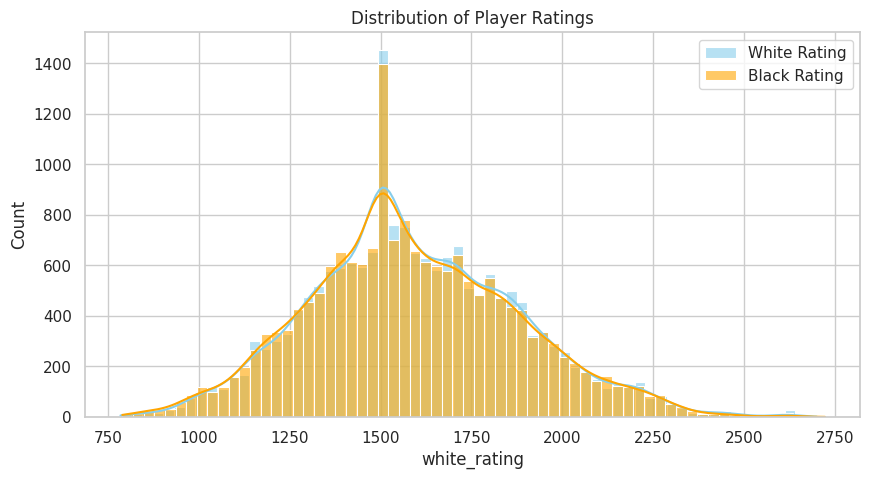

In [4]:
# Plot 1: Distribution of Games Won (Check for Class Imbalance)
plt.figure(figsize=(6, 4))
sns.countplot(x='winner', data=df, palette='coolwarm')
plt.title('Distribution of Wins (White vs Black)')
plt.show()

# Plot 2: Distribution of Ratings
plt.figure(figsize=(10, 5))
sns.histplot(df['white_rating'], color='skyblue', label='White Rating', kde=True, alpha=0.6)
sns.histplot(df['black_rating'], color='orange', label='Black Rating', kde=True, alpha=0.6)
plt.legend()
plt.title('Distribution of Player Ratings')
plt.show()

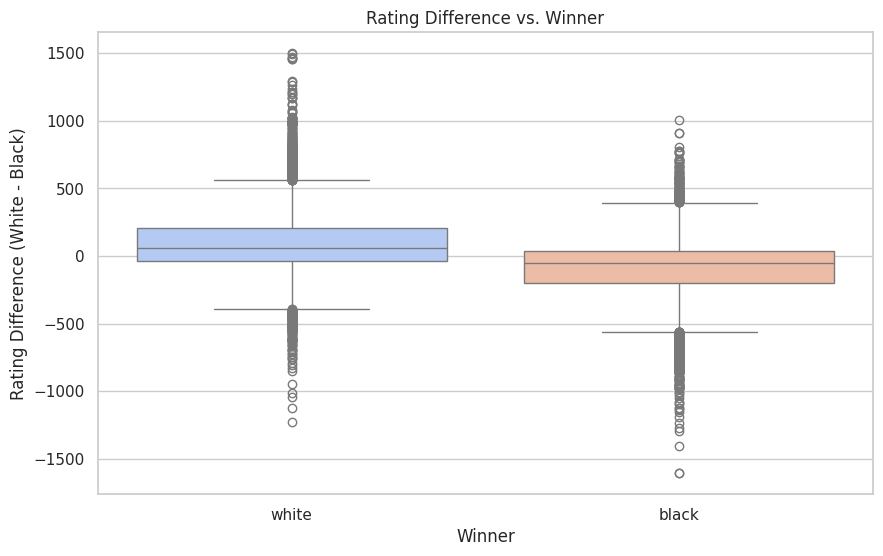

Observation: When White wins, the rating difference tends to be positive. When Black wins, it tends to be negative.


In [5]:
# Plot 3: Does Rating Difference affect Winning?
# We expect a strong relationship here
plt.figure(figsize=(10, 6))
sns.boxplot(x='winner', y='rating_difference', data=df, palette='coolwarm')
plt.title('Rating Difference vs. Winner')
plt.xlabel('Winner')
plt.ylabel('Rating Difference (White - Black)')
plt.show()

print("Observation: When White wins, the rating difference tends to be positive. When Black wins, it tends to be negative.")

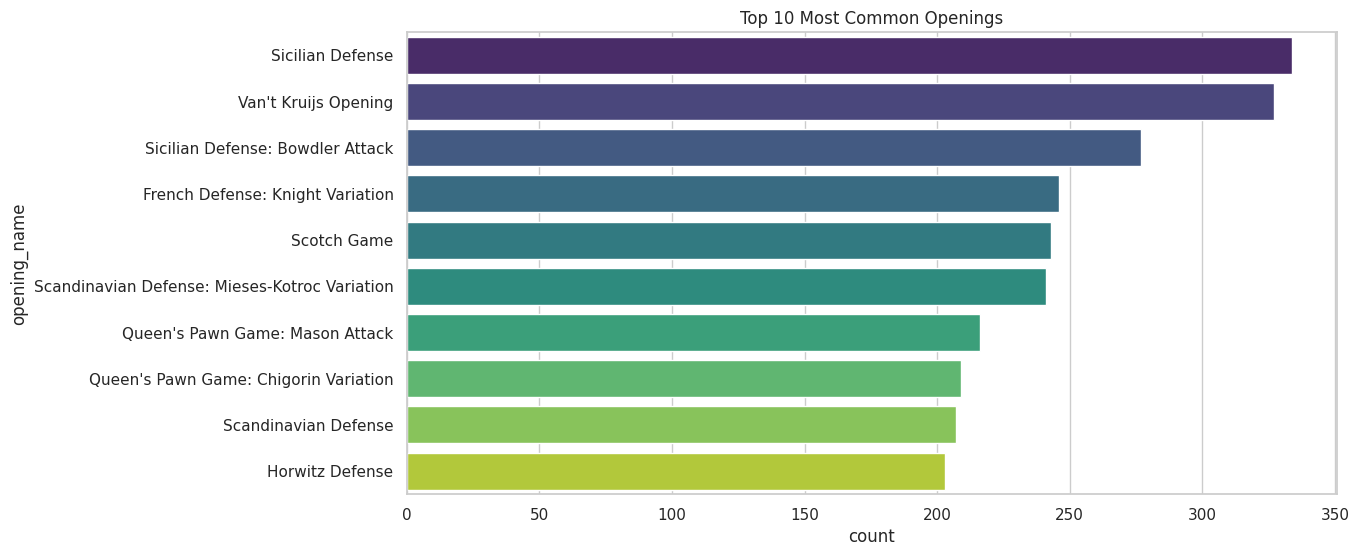

In [6]:
# Plot 4: Top 10 Most Popular Openings
top_openings = df['opening_name'].value_counts().head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(y='opening_name', data=df[df['opening_name'].isin(top_openings)],
              order=top_openings, palette='viridis')
plt.title('Top 10 Most Common Openings')
plt.show()

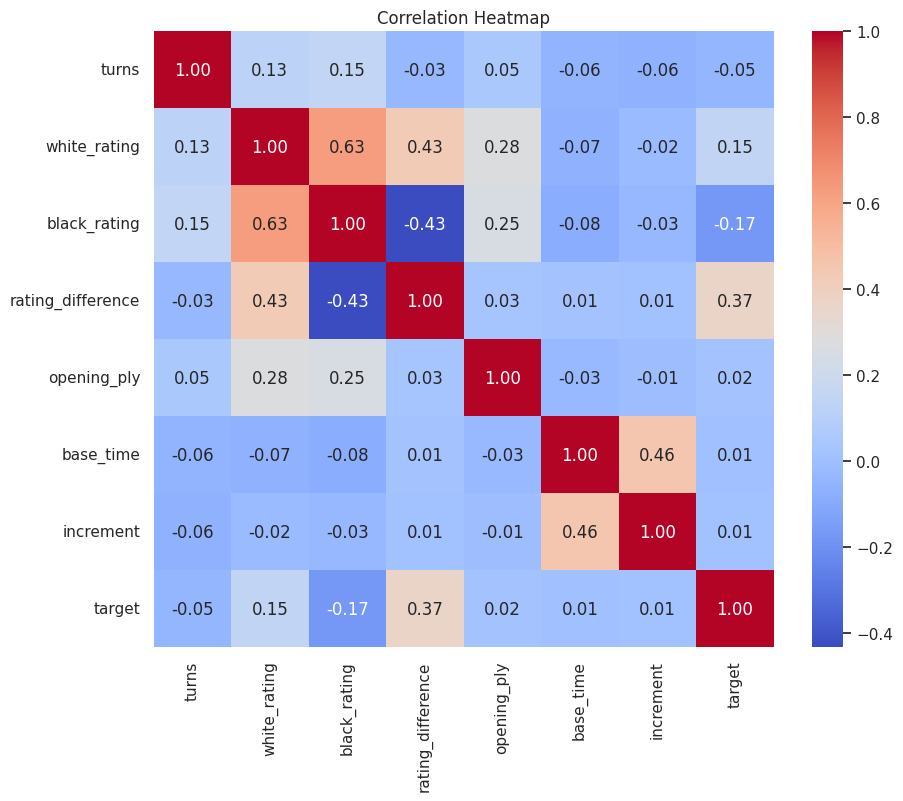

In [7]:
# Select only numerical columns for correlation
numerical_cols = ['turns', 'white_rating', 'black_rating', 'rating_difference', 'opening_ply', 'base_time', 'increment', 'target']

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Save to CSV
df.to_csv('clean_games.csv', index=False)
print("Cleaned dataset saved as 'clean_games.csv'. Ready for modeling!")

Cleaned dataset saved as 'clean_games.csv'. Ready for modeling!
